In [ ]:
# For google colab
#!pip install git+https://github.com/jmillanacosta/pyaop.git
#!pip install dash dash_cytoscape
#!pip install pandas

# AOP Network Builder

This notebook demonstrates how to build an Adverse Outcome Pathway (AOP) network by querying data from the [AOP-Wiki RDF](https://aopwiki.rdf.bigcat-bioinformatics.org/) or loading several exported files with the `pyaop` library.

The `AOPNetworkBuilder` class provides methods to construct the network by querying or parsing for AOPs, Key Events (KEs), Key Event Relationships (KERs) #TODO, Molecular Initiating Events (MIEs), genes, compounds, and Key Event components.

After constructing a network, we can retrieve the resulting AOP network by getting the `network` attribute of the builder instance and export it to various formats for further analysis or visualization.

In [20]:
from pyaop.aop.builder import AOPNetworkBuilder
import pandas as pd

## Querying from AOP-Wiki RDF

An empty builder is initialized from the `AOPNetworkBuilder` class:


In [21]:
builder = AOPNetworkBuilder()
print(builder.network.get_summary())

{'total_key_events': 0, 'mie_count': 0, 'ao_count': 0, 'ke_count': 0, 'ker_count': 0, 'gene_associations': 0, 'gene_expression_associations': 0, 'compound_associations': 0, 'component_associations': 0, 'organ_associations': 0, 'total_aops': 0}


The builder has several methods to query different aspects of the AOP network:

In [22]:
print("-", "\n- ".join([i for i in dir(builder) if i.startswith("query")]))

- query_by_identifier
- query_components_for_network
- query_compounds_for_network
- query_gene_expression
- query_genes_for_ke
- query_organs_for_kes


Querying will populate the `network` attribute of the builder instance, which is an `AOPNetwork` instance (see [notebook on AOPNetwork]()).

In [23]:
print(type(builder.network))
print("-", "\n- ".join([i for i in dir(builder) if not i.startswith("_")]))

<class 'pyaop.aop.core_model.AOPNetwork'>
- network
- query_by_identifier
- query_components_for_network
- query_compounds_for_network
- query_gene_expression
- query_genes_for_ke
- query_organs_for_kes
- update_from_json


### Querying AOPs

The builder can retrieve Key Events and Key Event Relationships for all AOPs in the AOP-Wiki RDF by calling the `query_components_for_network` method on values:
```python
# AOP identifiers
builder.query_by_identifier(
    query_type="aop", values="https://identifiers.org/aop/1 https://identifiers.org/aop/2"
# MIE identifiers
builder.query_by_identifier(
    query_type="mie", values="https://identifiers.org/aop.events/1502"
)
# Non-MIE KE identifiers
builder.query_by_identifier(
    query_type="ke", values="https://identifiers.org/aop.events/1503"
)
```

In this example, we query for all KE downstream of the MIE with identifier https://identifiers.org/aop.events/1502 (Histone deacetylase inhibition)

In [24]:
builder.query_by_identifier(
    query_type="mie", values="https://identifiers.org/aop.events/1502"
)
print(builder.network.get_summary())

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 0, 'gene_expression_associations': 0, 'compound_associations': 0, 'component_associations': 0, 'organ_associations': 0, 'total_aops': 3}


In [27]:
aop_df = pd.DataFrame(builder.network.aop_table())
aop_df

,source_id,source_label,source_type,ker_label,curie,target_id,target_label,target_type,aop_list,aop_titles,is_connected
0,https://identifiers.org/aop.events/1515,Spermatocyte depletion,ke,1734,aop.relationships:1734,https://identifiers.org/aop.events/1506,Testicular atrophy,ao,AOP:212,Histone deacetylase inhibition leading to test...,True
1,https://identifiers.org/aop.events/1505,"Cell cycle, disrupted",ke,1712,aop.relationships:1712,https://identifiers.org/aop.events/1262,Apoptosis,ke,AOP:212,Histone deacetylase inhibition leading to test...,True
2,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,2010,aop.relationships:2010,https://identifiers.org/aop.events/1515,Spermatocyte depletion,ke,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True
3,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,1716,aop.relationships:1716,https://identifiers.org/aop.events/1262,Apoptosis,ke,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True
4,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,1715,aop.relationships:1715,https://identifiers.org/aop.events/1505,"Cell cycle, disrupted",ke,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True
5,https://identifiers.org/aop.events/1262,Apoptosis,ke,1735,aop.relationships:1735,https://identifiers.org/aop.events/1515,Spermatocyte depletion,ke,AOP:212,Histone deacetylase inhibition leading to test...,True
6,https://identifiers.org/aop.events/1503,"Histone acetylation, increase",ke,1997,aop.relationships:1997,https://identifiers.org/aop.events/1505,"Cell cycle, disrupted",ke,"AOP:212,AOP:275",Histone deacetylase inhibition leading to test...,True
7,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,1709,aop.relationships:1709,https://identifiers.org/aop.events/1503,"Histone acetylation, increase",ke,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True
8,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,1717,aop.relationships:1717,https://identifiers.org/aop.events/1506,Testicular atrophy,ao,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True
9,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,mie,1805,aop.relationships:1805,https://identifiers.org/aop.events/1558,"Collagen production, reduced",ke,"AOP:212,AOP:274,AOP:275",Histone deacetylase inhibition leading to test...,True


### Querying gene associations
The builder can also query for gene associations to KEs in the network. More on the provenance of these annotations in the [documentation]().

In [31]:
builder.query_genes_for_ke(include_proteins=False)
print(builder.network.gene_associations)

[GeneAssociation(ke_uri='https://identifiers.org/aop.events/1503', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1557', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1502', gene_id='ENSG00000048052', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1515', gene_id='ENSG00000049130', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1502', gene_id='ENSG00000094631', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1262', gene_id='ENSG00000109320', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1505', gene_id='ENSG00000110427', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1262', gene_id='ENSG00000116478', protein_id=None), GeneAssociation(ke_uri='https://identifiers.org/aop.events/1515', gene_id='ENSG00000118971', protein_id=None), 

In [32]:
gene_df = pd.DataFrame(builder.network.gene_table())
gene_df

,gene,protein,protein_id,gene_id,protein_node_id,expression_organs,expression_levels,expression_confidence,expression_ids
0,ENSG00000048052,N/A,N/A,gene_ENSG00000048052,N/A,N/A,N/A,N/A,N/A
1,ENSG00000049130,N/A,N/A,gene_ENSG00000049130,N/A,N/A,N/A,N/A,N/A
2,ENSG00000094631,N/A,N/A,gene_ENSG00000094631,N/A,N/A,N/A,N/A,N/A
3,ENSG00000109320,N/A,N/A,gene_ENSG00000109320,N/A,N/A,N/A,N/A,N/A
4,ENSG00000110427,N/A,N/A,gene_ENSG00000110427,N/A,N/A,N/A,N/A,N/A
5,ENSG00000116478,N/A,N/A,gene_ENSG00000116478,N/A,N/A,N/A,N/A,N/A
6,ENSG00000118971,N/A,N/A,gene_ENSG00000118971,N/A,N/A,N/A,N/A,N/A
7,ENSG00000124762,N/A,N/A,gene_ENSG00000124762,N/A,N/A,N/A,N/A,N/A
8,ENSG00000141510,N/A,N/A,gene_ENSG00000141510,N/A,N/A,N/A,N/A,N/A
9,ENSG00000147099,N/A,N/A,gene_ENSG00000147099,N/A,N/A,N/A,N/A,N/A


### Querying compound (stressor) associations
The builder can also query for compound (stressor) associations to KEs in the network. More on the provenance of these annotations in the [documentation]().

In [33]:
builder.query_compounds_for_network()
print(builder.network.get_summary())
print(builder.network.compound_associations)
compound_df = pd.DataFrame(builder.network.compound_table())
compound_df

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 0, 'compound_associations': 10, 'component_associations': 0, 'organ_associations': 0, 'total_aops': 3}
[CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='https://identifiers.org/cas/183506-66-3', chemical_label='Apicidin', pubchem_compound='https://identifiers.org/pubchem.compound/467801', compound_name='Apicidin', cas_id='467801'), CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='https://identifiers.org/cas/183506-66-3', chemical_label='Apicidin', pubchem_compound='https://identifiers.org/pubchem.compound/6918328', compound_name='Apicidin', cas_id='6918328'), CompoundAssociation(aop_uri='https://identifiers.org/aop/274', mie_uri='https://identifiers.org/aop.events/1502', chemical_uri='htt

,compound_name,chemical_label,pubchem_id,pubchem_compound,cas_id,chemical_uri,smiles,node_id
0,Apicidin,Apicidin,467801,https://identifiers.org/pubchem.compound/467801,467801,https://identifiers.org/cas/183506-66-3,,chemical_467801
1,Apicidin,Apicidin,6918328,https://identifiers.org/pubchem.compound/6918328,6918328,https://identifiers.org/cas/183506-66-3,,chemical_6918328
2,Butyrate,Butyrate,104775,https://identifiers.org/pubchem.compound/104775,104775,https://identifiers.org/cas/461-55-2,,chemical_104775
3,MS-275,MS-275,4261,https://identifiers.org/pubchem.compound/4261,4261,https://identifiers.org/cas/209783-80-2,,chemical_4261
4,Methoxyacetic acid,Methoxyacetic acid,12251,https://identifiers.org/pubchem.compound/12251,12251,https://identifiers.org/cas/625-45-6,,chemical_12251
5,Suberoylanilide hydroxamic acid,Suberoylanilide hydroxamic acid,5311,https://identifiers.org/pubchem.compound/5311,5311,https://identifiers.org/cas/149647-78-9,,chemical_5311
6,Trichostatin A,Trichostatin A,444732,https://identifiers.org/pubchem.compound/444732,444732,https://identifiers.org/cas/58880-19-6,,chemical_444732
7,Valproic acid,Valproic acid,3121,https://identifiers.org/pubchem.compound/3121,3121,https://identifiers.org/cas/99-66-1,,chemical_3121


### Querying Organ associations
The builder can also query for organ associations to KEs in the network. They are modeled like components, but have a different source. More on the provenance of these annotations in the [documentation]().

In [34]:
builder.query_organs_for_kes()
print(builder.network.get_summary())
print(builder.network.organ_associations)
organ_df = pd.DataFrame(builder.network.component_table())
organ_df

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 0, 'compound_associations': 10, 'component_associations': 0, 'organ_associations': 6, 'total_aops': 3}
[OrganAssociation(ke_uri='https://identifiers.org/aop.events/1502', organ_data=<pyaop.cytoscape.elements.CytoscapeNode object at 0x7692273c6990>, edge_data=<pyaop.cytoscape.elements.CytoscapeEdge object at 0x7691fa6f7850>), OrganAssociation(ke_uri='https://identifiers.org/aop.events/1505', organ_data=<pyaop.cytoscape.elements.CytoscapeNode object at 0x7692273c6990>, edge_data=<pyaop.cytoscape.elements.CytoscapeEdge object at 0x7691f8ea67d0>), OrganAssociation(ke_uri='https://identifiers.org/aop.events/1262', organ_data=<pyaop.cytoscape.elements.CytoscapeNode object at 0x7692273c6990>, edge_data=<pyaop.cytoscape.elements.CytoscapeEdge object at 0x7691f8ea5110>), OrganAssociation(ke_uri='https://identifiers.org/aop.events/1503', organ_data=<pya

,ke_id,ke_number,ke_uri,ke_name,action_processes,organs,action_process_count,organ_count
0,aop.events_1262,1262,https://identifiers.org/aop.events/1262,Apoptosis,[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
1,aop.events_1503,1503,https://identifiers.org/aop.events/1503,"Histone acetylation, increase",[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
2,aop.events_1506,1506,https://identifiers.org/aop.events/1506,Testicular atrophy,[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
3,aop.events_1502,1502,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
4,aop.events_1505,1505,https://identifiers.org/aop.events/1505,"Cell cycle, disrupted",[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
5,aop.events_1515,1515,https://identifiers.org/aop.events/1515,Spermatocyte depletion,[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1


### Querying AOP Component associations
The builder can also query for AOP components for the KEs in the network. More on the provenance of these annotations in the [documentation]().

In [35]:
builder.query_components_for_network()
print(builder.network.get_summary())
print(builder.network.component_associations)
component_df = pd.DataFrame(builder.network.component_table())
component_df

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 0, 'compound_associations': 10, 'component_associations': 7, 'organ_associations': 6, 'total_aops': 3}
[ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1239', ke_name='', process='http://purl.obolibrary.org/obo/GO_0010467', process_name='gene expression', object='', object_name='', action='abnormal', object_type=''), ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1262', ke_name='', process='http://purl.obolibrary.org/obo/GO_0006915', process_name='apoptotic process', object='', object_name='', action='increased', object_type=''), ComponentAssociation(ke_uri='https://identifiers.org/aop.events/1502', ke_name='', process='http://purl.obolibrary.org/obo/GO_0004857', process_name='enzyme inhibitor activity', object='http://purl.obolibrary.org/obo/PR_000008478', object_name='histone deacetylase 1', action='decreased

,ke_id,ke_number,ke_uri,ke_name,action_processes,organs,action_process_count,organ_count
0,aop.events_1239,1239,https://identifiers.org/aop.events/1239,"Altered, Gene Expression","[{'action': 'abnormal', 'process_id': 'process...",[],1,0
1,aop.events_1262,1262,https://identifiers.org/aop.events/1262,Apoptosis,"[{'action': 'increased', 'process_id': 'proces...",[{'organ_id': 'http://purl.obolibrary.org/obo/...,1,1
2,aop.events_1505,1505,https://identifiers.org/aop.events/1505,"Cell cycle, disrupted","[{'action': 'disrupted', 'process_id': 'proces...",[{'organ_id': 'http://purl.obolibrary.org/obo/...,1,1
3,aop.events_1515,1515,https://identifiers.org/aop.events/1515,Spermatocyte depletion,[],[{'organ_id': 'http://purl.obolibrary.org/obo/...,0,1
4,aop.events_1560,1560,https://identifiers.org/aop.events/1560,"Cell differentiation, altered","[{'action': 'abnormal', 'process_id': 'process...",[],1,0
5,aop.events_1503,1503,https://identifiers.org/aop.events/1503,"Histone acetylation, increase","[{'action': 'increased', 'process_id': 'proces...",[{'organ_id': 'http://purl.obolibrary.org/obo/...,1,1
6,aop.events_1506,1506,https://identifiers.org/aop.events/1506,Testicular atrophy,"[{'action': 'increased', 'process_id': 'proces...",[{'organ_id': 'http://purl.obolibrary.org/obo/...,1,1
7,aop.events_1502,1502,https://identifiers.org/aop.events/1502,Histone deacetylase inhibition,"[{'action': 'decreased', 'process_id': 'proces...",[{'organ_id': 'http://purl.obolibrary.org/obo/...,1,1


## Querying external APIs and databases (WIP)
The builder can also query external APIs and databases to enrich the AOP network with additional data, such as gene expression data from Bgee.

In [36]:
builder.query_gene_expression(confidence_level=99)
print(builder.network.get_summary())
print(builder.network.gene_expression_associations)
gene_expr_df = pd.DataFrame(builder.network.gene_expression_table())
gene_expr_df

{'total_key_events': 12, 'mie_count': 1, 'ao_count': 3, 'ke_count': 8, 'ker_count': 17, 'gene_associations': 26, 'gene_expression_associations': 864, 'compound_associations': 10, 'component_associations': 7, 'organ_associations': 6, 'total_aops': 3}
[GeneExpressionAssociation(gene_id='ENSG00000048052', anatomical_id='http://purl.obolibrary.org/obo/UBERON_0000473', anatomical_name='testis', expression_level='89.578460000000006858', confidence_id='http://purl.obolibrary.org/obo/CIO_0000029', confidence_level_name='high confidence level', developmental_id='http://purl.obolibrary.org/obo/HsapDv_0000095', developmental_stage_name='80 year-old and over stage (human)', expr='http://bgee.org/#EXPRESSION_103607213'), GeneExpressionAssociation(gene_id='ENSG00000048052', anatomical_id='http://purl.obolibrary.org/obo/UBERON_0000473', anatomical_name='testis', expression_level='89.578460000000006858', confidence_id='http://purl.obolibrary.org/obo/CIO_0000029', confidence_level_name='high confidence

,gene_id,gene_label,organ,organ_id,expression_level,confidence,developmental_stage,expr_id
0,ENSG00000048052,ENSG00000048052,testis,http://purl.obolibrary.org/obo/UBERON_0000473,89.578460000000006858,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_103607213
1,ENSG00000049130,ENSG00000049130,testis,http://purl.obolibrary.org/obo/UBERON_0000473,55.153919999999999391,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_154523557
2,ENSG00000094631,ENSG00000094631,testis,http://purl.obolibrary.org/obo/UBERON_0000473,97.346350000000001046,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_40168603
3,ENSG00000109320,ENSG00000109320,testis,http://purl.obolibrary.org/obo/UBERON_0000473,83.498869999999996594,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_162691126
4,ENSG00000110427,ENSG00000110427,testis,http://purl.obolibrary.org/obo/UBERON_0000473,51.020060000000000855,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_167787429
5,ENSG00000116478,ENSG00000116478,testis,http://purl.obolibrary.org/obo/UBERON_0000473,94.644689999999997099,high confidence level,third decade stage (human),http://bgee.org/#EXPRESSION_35376778
6,ENSG00000118971,ENSG00000118971,testis,http://purl.obolibrary.org/obo/UBERON_0000473,73.78740999999999417,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_26089081
7,ENSG00000124762,ENSG00000124762,testis,http://purl.obolibrary.org/obo/UBERON_0000473,96.325220000000001619,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_147593673
8,ENSG00000141510,ENSG00000141510,testis,http://purl.obolibrary.org/obo/UBERON_0000473,76.709209999999998786,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_47923384
9,ENSG00000147099,ENSG00000147099,testis,http://purl.obolibrary.org/obo/UBERON_0000473,67.42464999999999975,high confidence level,80 year-old and over stage (human),http://bgee.org/#EXPRESSION_219681793


## Exporting the resulting AOP Network
After building the network, we can export it to various formats:

### Export to Cytoscape JSON
The network and its styles are exported to Cytoscape JSON format using the `to_cytoscape_elements` method.

In [11]:
my_aop_network = builder.network
cy_network = my_aop_network.to_cytoscape_elements()
print(cy_network.keys())

dict_keys(['elements', 'style', 'layout'])


In [12]:
elements = cy_network["elements"]
stylesheet = cy_network["style"]
layout = cy_network["layout"]

### Interactive network visualization in Cytoscape

In [13]:
from dash import Dash, html
import dash_cytoscape as cyto

app = Dash()

app.layout = html.Div(
    [
        cyto.Cytoscape(
            id="cytoscape-aop-network",
            layout=layout,
            stylesheet=stylesheet,
            elements=elements,
            style={"width": "100%", "height": "800px"},
        )
    ]
)
app.run(mode="inline")

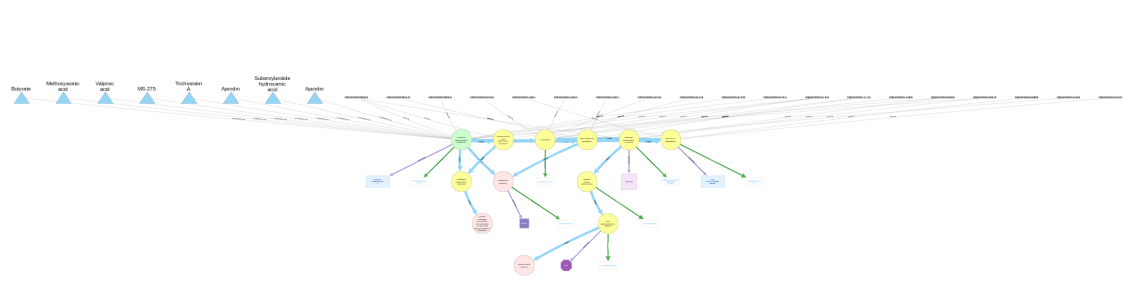

## Loading an AOP Network from Cytoscape JSON
The exported Cytoscape JSON elements can be loaded back into an `AOPNetwork` instance using the `from_cytoscape_elements` class method.

We can verify that the round-trip conversion (AOPNetwork > Cytoscape > AOPNetwork) preserves the data integrity:

In [14]:
round_build = AOPNetworkBuilder()

In [15]:
round_build.update_from_json(cy_network)


In [16]:
# Test round-trip data integrity
original_summary = builder.network.get_summary()
loaded_summary = round_build.network.get_summary()

print("Round-trip integrity check:")
for key in original_summary:
    original_val = original_summary[key]
    loaded_val = loaded_summary[key]
    status = "y" if original_val == loaded_val else "x"
    print(f"{status} {key}: {original_val} → {loaded_val}")

# Check AOP info preservation
original_aops = set(builder.network.aop_info.keys())
loaded_aops = set(round_build.network.aop_info.keys())
aop_status = "y" if original_aops == loaded_aops else "x"
print(f"{aop_status} AOP IDs preserved: {len(original_aops)} → {len(loaded_aops)}")

round_trip_network = round_build.network.to_cytoscape_elements()

Round-trip integrity check:
y total_key_events: 12 → 12
y mie_count: 1 → 1
y ao_count: 3 → 3
y ke_count: 8 → 8
y ker_count: 17 → 17
y gene_associations: 26 → 26
y gene_expression_associations: 0 → 0
y compound_associations: 10 → 10
y component_associations: 7 → 7
x organ_associations: 6 → 8
y total_aops: 3 → 3
y AOP IDs preserved: 3 → 3


In [17]:
app = Dash()

app.layout = html.Div(
    [
        cyto.Cytoscape(
            id="cytoscape-aop-network",
            layout=round_trip_network["layout"],
            stylesheet=round_trip_network["style"],
            elements=round_trip_network["elements"],
            style={"width": "100%", "height": "800px"},
        )
    ]
)
app.run(mode="inline")

### Export to Cytoscape CX2
The network, metadata, and its styles are exported to Cytoscape Export format (CX2) using the `to_cx2` method.

### Export to RDF
The network can be exported to RDF using the `to_rdf` method.